<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts1
%matplotlib inline
import statistics as sts
import ssl
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [105]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [106]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

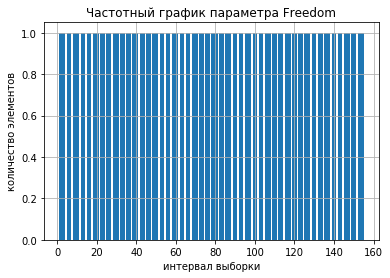

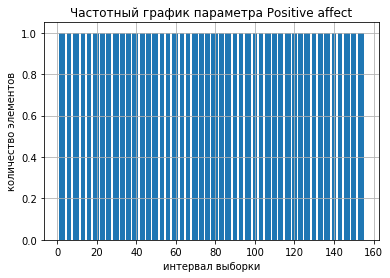

In [115]:
# равномерное распределение

data1 = df['Freedom'].sort_values()
plt.hist(data1, 200)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график параметра Freedom')
plt.grid(True)
plt.show()

data2 = df['Positive affect'].sort_values()
plt.hist(data2, 200)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график параметра Positive affect')
plt.grid(True)
plt.show()

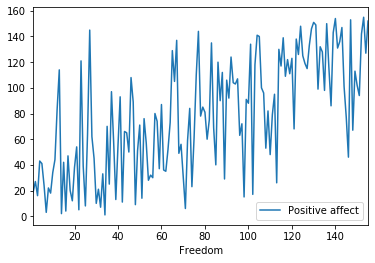

In [34]:
df_freedom = df[['Freedom', 'Positive affect']].sort_values('Freedom').reset_index(drop=True)
# df_freedom
df_freedom.plot(x='Freedom', y='Positive affect', kind="line")

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [78]:
df_freedom = df['Freedom'].dropna()

print('Медиана: ', sts.median(df_freedom))
# print('Мода: ', sts.mode(df_freedom))
print('Мат. ожидание: ', sts.mean(df_freedom))
print('Станд. отклонение: ', sts.pstdev(df_freedom))
print('Дисперсия: ', sts.pvariance(df_freedom))
min_ = min(df_freedom)
max_ = max(df_freedom)
print('Минимум: ', min_)
print('Максимум: ', max_)
print('Размах: ', max_ - min_)

# Нет выбросов

Медиана:  78.0
Мат. ожидание:  78.0
Станд. отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


Почему нельзя найти моду?

In [0]:
# Невозможно найти моду поскольку все значения уникальны

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

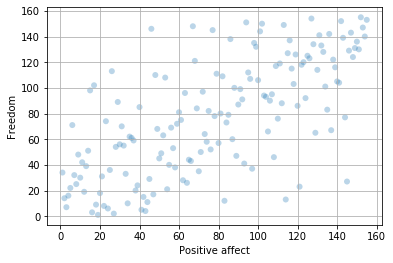

0.6817698430601657


In [85]:
affect = df['Positive affect'].dropna()
freedom = df['Freedom'].dropna()
fig, ax = plt.subplots()
ax.scatter(affect, freedom, alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.show()

corr, p_value = pearsonr(affect, freedom)
print(corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [89]:
freedom = df['Freedom'].dropna()
# Нормализация
freedom_1 = freedom - statistics.mean(freedom)
print(min(freedom_1))
print(max(freedom_1))

# Масштабирование
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

-77.0
77.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

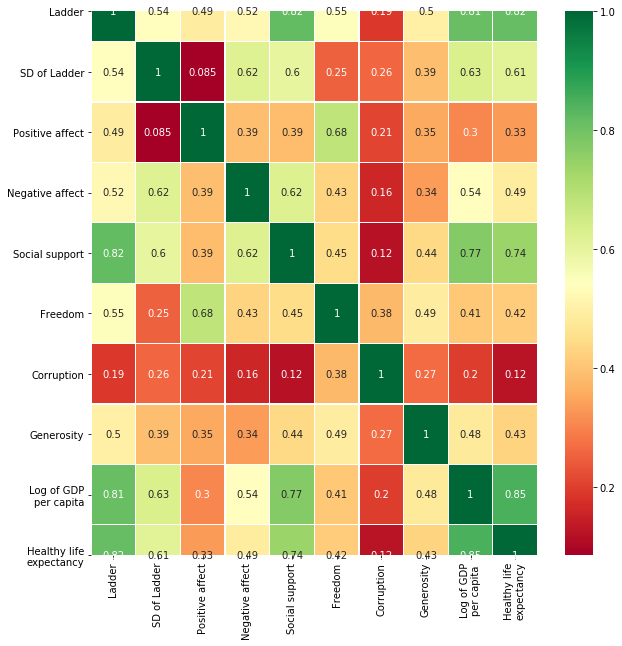

In [101]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [118]:
import io
import requests
df1 = pd.read_csv('avocado.csv')
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

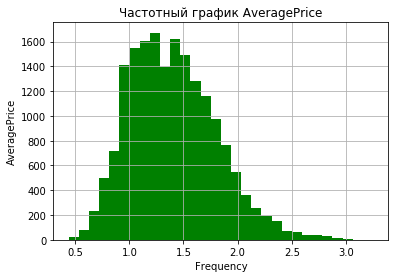

In [116]:
# Нормальное распределение

df_avgprice = df1['AveragePrice'].sort_values()

n, bins, patches = plt.hist(df_avgprice, 30, facecolor='g')
plt.xlabel('Frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

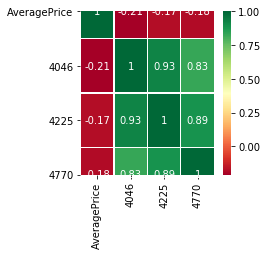

In [126]:
df_comp = df1[['AveragePrice', '4046', '4225', '4770']]
df_comp

sns.heatmap(df_comp.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(3,3)

plt.xticks(rotation=90) 
plt.yticks(rotation=0)

plt.show()

In [139]:
set_ = ['4046', '4225', '4770']
for i in set_:
    coef, p = sts1.spearmanr(df1['AveragePrice'], df1[i])
    print(f'Spearmans coefficient for {i}: %.3f' % coef)
    coef, p = sts1.kendalltau(df1['AveragePrice'], df1[i])
    print(f'Kendalltau coefficient for {i}: %.3f' % coef)

Spearmans coefficient for 4046: -0.596
Kendalltau coefficient for 4046: -0.417
Spearmans coefficient for 4225: -0.514
Kendalltau coefficient for 4225: -0.344
Spearmans coefficient for 4770: -0.533
Kendalltau coefficient for 4770: -0.375


In [ ]:
# Между AveragePrice и 4046, 4225, 4770 есть слабая обратная корреляция. 
# Чем выше AveragePrice, тем меньше в продаже авокадо с данным кодом.